In [53]:
## Generate the random data
import numpy as np
np.random.seed(42) ## To be able to recreate the results
# (b - a) * random_sample() + a -> Random number between b = -5 and a = 5
betas = -10 * np.random.random_sample((101,1)) + 5
# The intercept column
x0 = np.ones([1000,1])
# Random values for the variables between 0 and 10 following a uniform distribution
x1 = np.random.uniform(0,10,([1000,100]))
x = np.concatenate([x0, x1], axis=1)
error = np.random.normal(0,1,[1000,1])
y = np.dot(x,betas)+error
y.shape

(1000, 1)

a) Estimate the value of the regression coefficients by implementing the analytical solution

In [141]:
## Helper function to compare the value of the Betas
import matplotlib.pyplot as plt
def compare(betas1, betas2):
    # compare the coefficients
    plt.plot(betas1[:,0]-betas2[:,0], color='g')

    barWidth = 0.4
    x1 = np.asarray([i for i in range(101)])
    x2 = barWidth*np.ones(101)+x1

    #[i for i in range(betas1.shape[0])]
    #[np.int(i)+barWidth for i in range(betas2.shape[0])]
    plt.bar(x1, betas1[:,0], color='b', width=barWidth, edgecolor='white', label='Mod1')
    plt.bar(x2, betas2[:,0], color='r', width=barWidth, edgecolor='white', label='Mod2')

    plt.legend()
    plt.title("Coefficient comparison")
    plt.xlabel('Variables', fontweight='bold')
    plt.ylabel('Values of the coefficients', fontweight='bold')
    fig = plt.gcf()
    fig.set_size_inches(15,5)
    plt.show()

(101, 1)


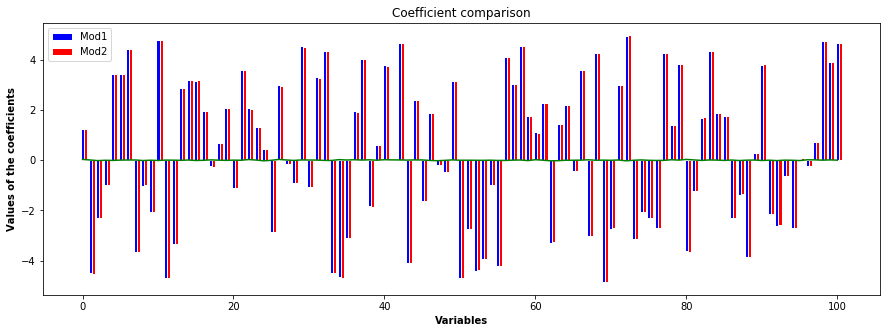

In [142]:
from numpy.linalg import inv
beta_ls_exact = np.dot(np.dot(inv(np.dot(x.T,x)),x.T),y)
print(beta_ls_exact.shape)
compare(betas, beta_ls_exact)

b) Estimate the value of the regression coefficients by using the function minimize from the Python module Scipy.optimize. Trying out at least 4 solvers.

In [90]:
## Least squares of a given model (function to be minimized during the optimization process)
def least_sq_reg(beta_ls, x, y):
    beta_ls=np.matrix(beta_ls)
    z=y-np.dot(x,beta_ls.T)
    return np.dot(z.T,z)

#### Nelder-Mead
- Explanntion of the algorithm (https://pdfs.semanticscholar.org/15b4/c4aa7437df4d032c6ee6ce98d6030dd627be.pdf)

/Users/Jaime/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


Optimization terminated successfully.
         Current function value: 6007523.277145
         Iterations: 300523
         Function evaluations: 317634
time elapsed= 72.82189700000004
(101, 1)


/Users/Jaime/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


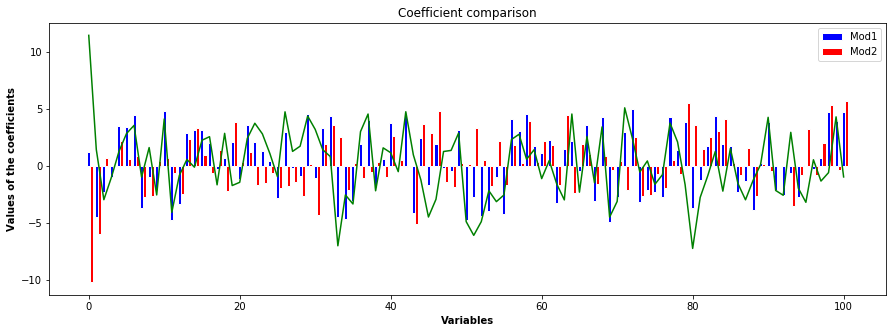

error= 1.0057983823386052


In [130]:
from scipy.optimize import minimize
import time

beta_ls0 = np.zeros(101) # Initial guess for the coefficients
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(x, y), method='Nelder-Mead', options={'disp': True, 'maxiter': 500000})
nfev = res.nfev
nit = res.nit

time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
betas_res = res.x
betas_res = np.reshape(betas_res, (101,1))
print(betas_res.shape)
compare(beta_ls_exact, betas_res) 
print('error=',np.linalg.norm(beta_ls_exact.T-res.x,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2))

In [121]:
print(res)

 final_simplex: (array([[-10.20025398,  -5.94234725,   0.65680626, ...,   5.33666309,
         -0.38060526,   5.65038043],
       [-10.20025361,  -5.94233705,   0.65681316, ...,   5.33666356,
         -0.38059839,   5.650388  ],
       [-10.20025433,  -5.94233994,   0.65680692, ...,   5.33666086,
         -0.38058736,   5.65037806],
       ...,
       [-10.20024012,  -5.94234161,   0.65681119, ...,   5.33667165,
         -0.38059694,   5.65039056],
       [-10.20025637,  -5.94234377,   0.65679636, ...,   5.33667022,
         -0.38060175,   5.65038085],
       [-10.20025376,  -5.94233239,   0.6568062 , ...,   5.33666552,
         -0.38059866,   5.65038434]]), array([6007523.27714456, 6007523.27715005, 6007523.27715017,
       6007523.27715487, 6007523.27715524, 6007523.27715646,
       6007523.27715708, 6007523.27715746, 6007523.2771604 ,
       6007523.27716121, 6007523.27716366, 6007523.27716755,
       6007523.27717005, 6007523.2771704 , 6007523.2771706 ,
       6007523.27717194, 600

#### Powell
- Explanation of the algorithm (https://www.ime.unicamp.br/~sandra/MS612/handouts/Fletcher1965.pdf)

/Users/Jaime/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Optimization terminated successfully.
         Current function value: 11841.293549
         Iterations: 386
         Function evaluations: 352542
time elapsed= 71.81745899999999
(101, 1)


/Users/Jaime/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


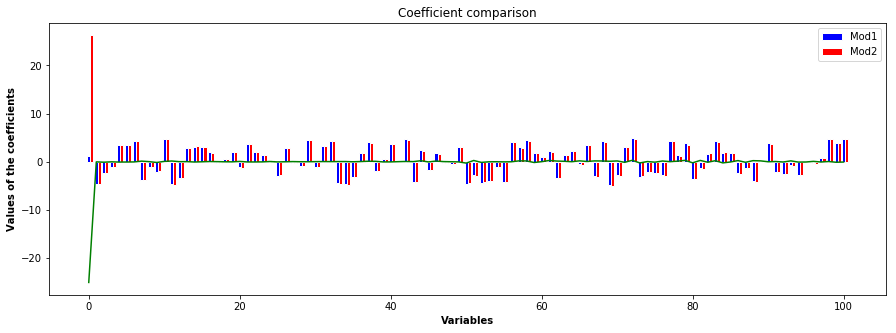

error= 0.8324670666879059


In [147]:
beta_ls0 = np.zeros(101) # Initial guess for the coefficients
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(x, y), method='Powell', options={'disp': True, 'maxiter': 500000})
time_elapsed = (time.clock() - time_start)

nfev = res.nfev
nit = res.nit

print('time elapsed=',time_elapsed)
betas_res = np.asarray(res.x)
betas_res = np.reshape(betas_res, (101,1))
print(betas_res.shape)
compare(beta_ls_exact, betas_res) 
print('error=',np.linalg.norm(beta_ls_exact.T-res.x,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2))

#### Conjugate Gradient
- Explanation of the algorithm

In [179]:
# The conjugate gradient method needs the first derivative of the objective function
def least_sq_reg_der(beta_ls,X,Y):
    beta_ls = np.matrix(beta_ls)
    pp = -2*np.dot((Y-np.dot(X,beta_ls.T)).T,X)
    aa = np.squeeze(np.asarray(pp))
    return aa


/Users/Jaime/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/Jaime/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


         Current function value: 982.017753
         Iterations: 167
         Function evaluations: 451
         Gradient evaluations: 440
time elapsed= 0.1742500000000291
(101, 1)


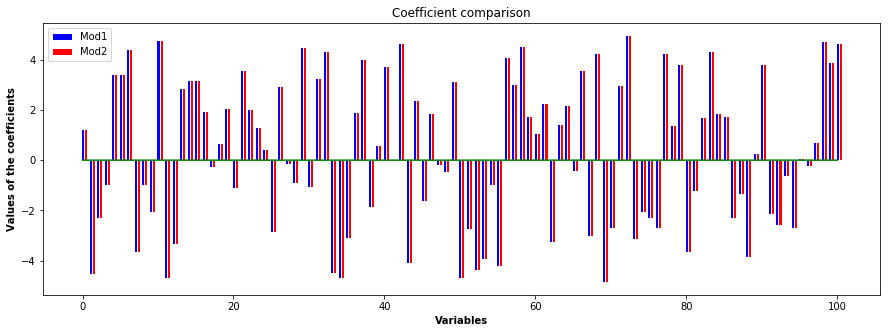

error= 1.1711409865903599e-06


In [151]:
beta_ls0 = np.zeros(101) # Initial guess for the coefficients
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, jac=least_sq_reg_der, args=(x, y), method='CG', options={'disp': True})
time_elapsed = (time.clock() - time_start)

nfev = res.nfev
nit = res.nit

print('time elapsed=',time_elapsed)
betas_res = res.x
betas_res = np.reshape(betas_res, (101,1))
print(betas_res.shape)
compare(beta_ls_exact, betas_res) 
print('error=',np.linalg.norm(beta_ls_exact.T-res.x,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2))

#### Newton Conjugate Gradient
- Explanation of the algorithm

In [152]:
# Even though the second derivative is not a requisite (as isn't the firs derivative in the previous case) we will provide it
def least_sq_reg_hess(beta_ls,X,Y):
    ss=2*np.dot(np.transpose(X),X)
    return ss

/Users/Jaime/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/Jaime/anaconda3/envs/python3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:507: RuntimeWarning: Method CG does not use Hessian information (hess).
  RuntimeWarning)
/Users/Jaime/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


         Current function value: 982.017753
         Iterations: 167
         Function evaluations: 451
         Gradient evaluations: 440
time elapsed= 0.14109799999982897
(101, 1)


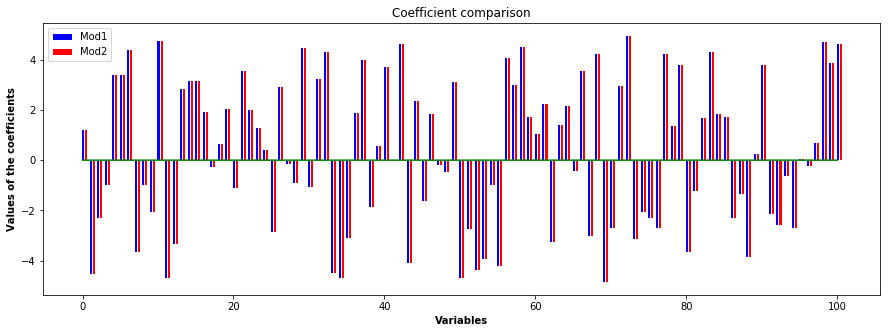

error= 1.1711409865903599e-06


In [153]:
beta_ls0 = np.zeros(101) # Initial guess for the coefficients
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, jac=least_sq_reg_der, hess=least_sq_reg_hess, args=(x, y), method='CG', options={'disp': True})
time_elapsed = (time.clock() - time_start)

nfev = res.nfev
nit = res.nit

print('time elapsed=',time_elapsed)
betas_res = res.x
betas_res = np.reshape(betas_res, (101,1))
print(betas_res.shape)
compare(beta_ls_exact, betas_res) 
print('error=',np.linalg.norm(beta_ls_exact.T-res.x,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2))

c) Estimate the value of the regression coefficients by implementing:

i. Gradient Method.

ii. Newton Method.

iii. Quasi-Newton Method.

iv. Stochastic Gradient Method.

#### Gradient Method implementation

(101,)
0


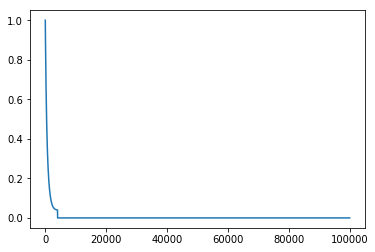

In [228]:
def gradDesc(x, y, obj_fun, jac, lr = 0.001, iterations = 100000, tol = 0.04):
    beta_lsg = np.zeros(101)
    OF_iter=np.zeros(iterations)
    tol_hist=np.zeros(iterations)
    print_step = iterations/10
    for it in range(iterations):
        if (it%print_step == 0):
            print(it)
        grad = jac(beta_lsg, x, y)
        sigma = 0.1
        beta = 0.1
        while (obj_fun(beta_lsg+lr*(-grad), x, y) > least_sq_reg(beta_lsg,x,y)+lr*sigma*np.dot(grad,-grad)):
            lr=lr*beta
        beta_lsg = beta_lsg+lr*(-grad)
        OF_iter[it] = obj_fun(beta_lsg,x,y)
        tol_val = np.linalg.norm(beta_ls_exact.T-beta_lsg,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2)
        tol_hist[it] = tol_val
        if (tol_val < tol):
            break
    return (beta_lsg, OF_iter, tol_hist)

time_start = time.clock()
(beta_gd, of_gd, tol_gd) = gradDesc(x, y, least_sq_reg, least_sq_reg_der)
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)

plt.plot(tol_gd)

0.03999981584496086


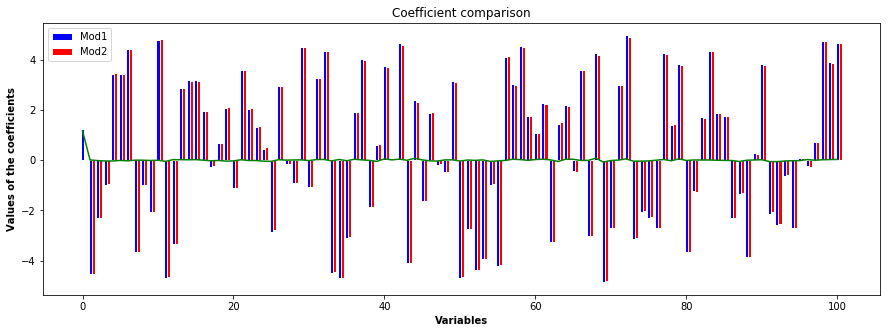

In [229]:
print(min(tol_gd[tol_gd>0]))
compare(beta_ls_exact, np.reshape(beta_gd, (101,1)))

#### Newton Method implementation

/Users/Jaime/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


0
time elapsed= 14.18477299999995


/Users/Jaime/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


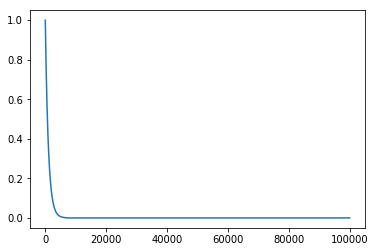

In [241]:
def newton(x, y, obj_fun, jac, hess, lr = 0.001, iterations = 100000, tol = 0.001):
    beta_lsn = np.zeros(101)
    OF_iter=np.zeros(iterations)
    tol_hist=np.zeros(iterations)
    print_step = iterations/10
    for it in range(iterations):
        if (it%print_step == 0):
            print(it)
        grad = jac(beta_lsn,x,y)
        hessian = hess(beta_lsn,x,y)
        ddirect = -np.dot(np.linalg.inv(hessian),grad)
        ###########################
        sigma=0.1
        beta=0.1
        #alpha=1
        while (obj_fun(beta_lsn+lr*ddirect,x,y) > obj_fun(beta_lsn, x, y)+lr*sigma*np.dot(grad,ddirect)):
            lr=lr*beta
        ###########################
        beta_lsn=beta_lsn+lr*ddirect
        OF_iter[it] = obj_fun(beta_lsn,x,y)
        tol_val = np.linalg.norm(beta_ls_exact.T-beta_lsn,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2)
        tol_hist[it] = tol_val
        if (tol_val < tol):
            break
    return (beta_lsn, OF_iter, tol_hist)

time_start = time.clock()
(beta_nw, OF_nw, tol_nw) = newton(x, y, least_sq_reg, least_sq_reg_der, least_sq_reg_hess)
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)

plt.plot(tol_nw)

0.0009993007201693934


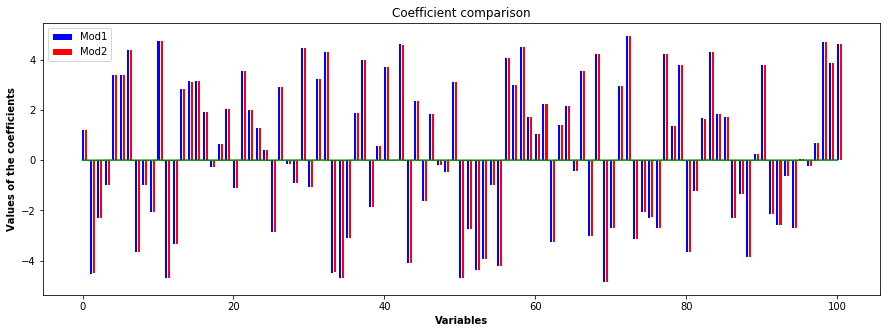

In [242]:
print(min(tol_nw[tol_nw>0]))
compare(beta_ls_exact, np.reshape(beta_nw, (101,1)))

d) Linear formulation for Least Absolute Regression